# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice.
combined_data= study_data_complete
num_mice = combined_data['Mouse ID'].nunique()
print(f'The number of mice in the dataset is: {num_mice}')

The number of mice in the dataset is: 249


In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Identify duplicate mice by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print("Duplicate mice by ID number:")
print(duplicate_mice)

Duplicate mice by ID number:
['g989']


In [23]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
print(duplicate_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Check the number of mice in the clean DataFrame
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f'The number of mice in the clean DataFrame is: {num_mice_clean}')

The number of mice in the clean DataFrame is: 249


In [25]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f'The number of mice in the clean DataFrame is: {num_mice_clean}')

The number of mice in the clean DataFrame is: 249


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(summary_statistics)

# Display the summary DataFrame
print(summary_df)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Define a custom function to calculate SEM
def sem_func(x):
    return x.sem()

# Use the agg method with the custom function to calculate all statistics
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', sem_func])

# Rename the columns for clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics table
print(summary_statistics)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

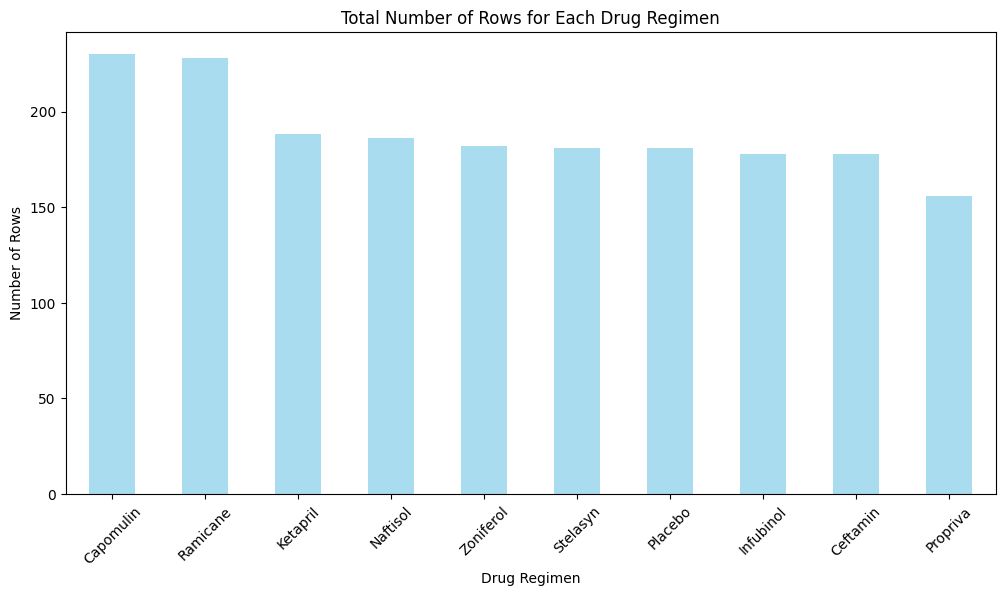

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the clean DataFrame by 'Drug Regimen' and count the number of rows
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(12, 6), color='skyblue', alpha=0.7)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

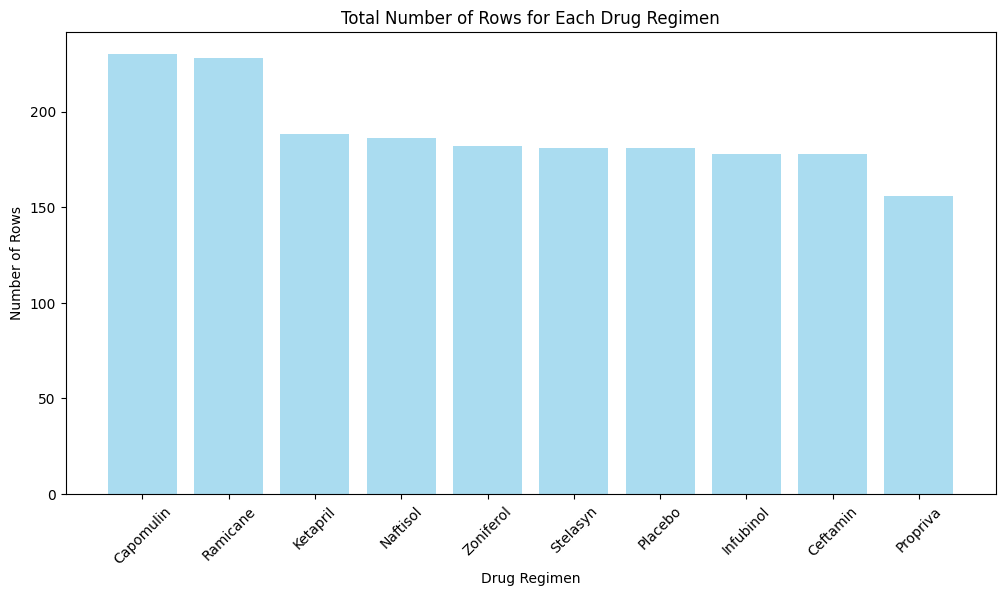

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a bar plot using Pyplot
plt.figure(figsize=(12, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue', alpha=0.7)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

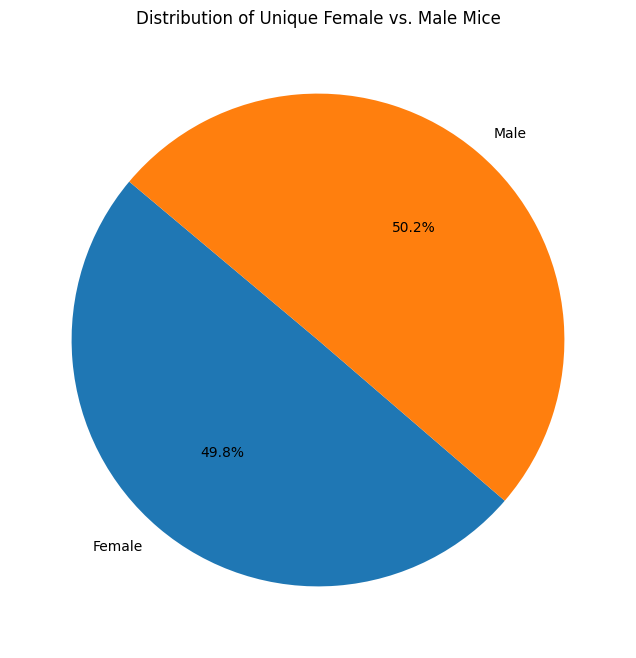

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']].groupby('Sex').count()


# Make the pie chart
unique_mice_gender.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%', startangle=140, figsize=(8, 8), legend=False)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.ylabel('')
plt.show()

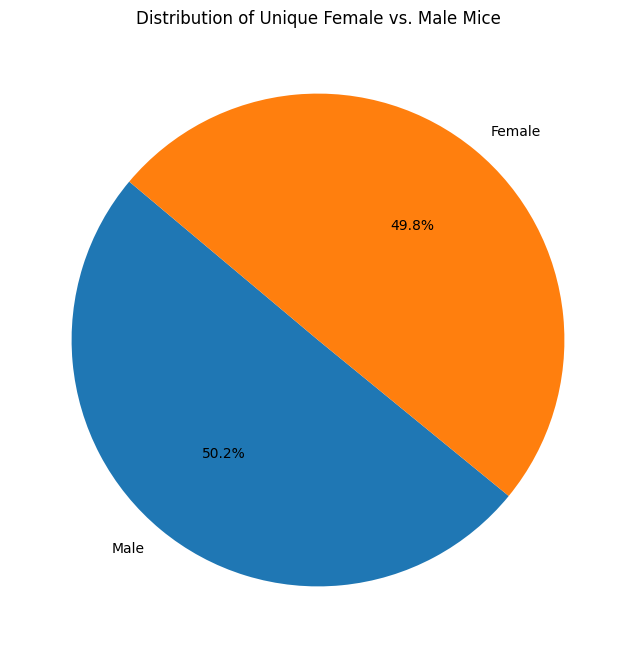

In [31]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Get the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last timepoint with the clean data to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume_four_regimens = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final tumor volume for each mouse in the four treatment regimens
print(final_tumor_volume_four_regimens)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
239     y769         45           68.594745                 4     Ceftamin   
240     y793         45           31.896238                 2    Capomulin   
241     y865         45           64.729837                 3     Ceftamin   
245     z578         45           30.638696                 0     Ramicane   
246     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = final_tumor_volume_four_regimens['Tumor Volume (mm3)'].quantile([0.25, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)

# Check for potential outliers
potential_outliers = final_tumor_volume_four_regimens[(final_tumor_volume_four_regimens['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_four_regimens['Tumor Volume (mm3)'] > upper_bound)]

print(f"The lower quartile of tumor volume is: {lower_quartile}")
print(f"The upper quartile of tumor volume is: {upper_quartile}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"Values below {lower_bound} could be potential outliers.")
print(f"Values above {upper_bound} could be potential outliers.")
print("Potential outliers:")
print(potential_outliers)

    # Locate the rows which contain mice on each drug and get the tumor volumes
drug_data = {}
for treatment in treatments_list:
    tumor_volumes = final_tumor_volume_four_regimens.loc[final_tumor_volume_four_regimens['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    drug_data[treatment] = tumor_volumes

# Display the tumor volumes for each drug regimen
for treatment, volumes in drug_data.items():
    print(f"Tumor volumes for {treatment}:")
    print(volumes)

    # add subset
drug_subset = {}
for treatment in treatments_list:
    subset_data = final_tumor_volume_four_regimens.loc[final_tumor_volume_four_regimens['Drug Regimen'] == treatment, ['Mouse ID', 'Tumor Volume (mm3)']]
    drug_subset[treatment] = subset_data

# Display the subset of rows containing mice on each drug and their tumor volumes
for treatment, subset in drug_subset.items():
    print(f"Subset of rows for {treatment}:")
    print(subset)

    # Determine outliers using upper and lower bounds
# Determine outliers using upper and lower bounds for each drug regimen
outliers = {}
for treatment, subset in drug_subset.items():
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Check for potential outliers
    potential_outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    outliers[treatment] = potential_outliers

# Display the potential outliers for each drug regimen
for treatment, potential_outliers in outliers.items():
    print(f"Potential outliers for {treatment}:")
    print(potential_outliers)

The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
Values below 3.0739668737500097 could be potential outliers.
Values above 94.04403868374999 could be potential outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Tumor volumes for Capomulin:
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
Tumor volumes for Ramicane:
6      38.407618
7      43.047

/var/folders/wf/77mppwtn4y1_1yq3sgnm3twr0000gp/T/ipykernel_42564/1227843798.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=treatments_list)


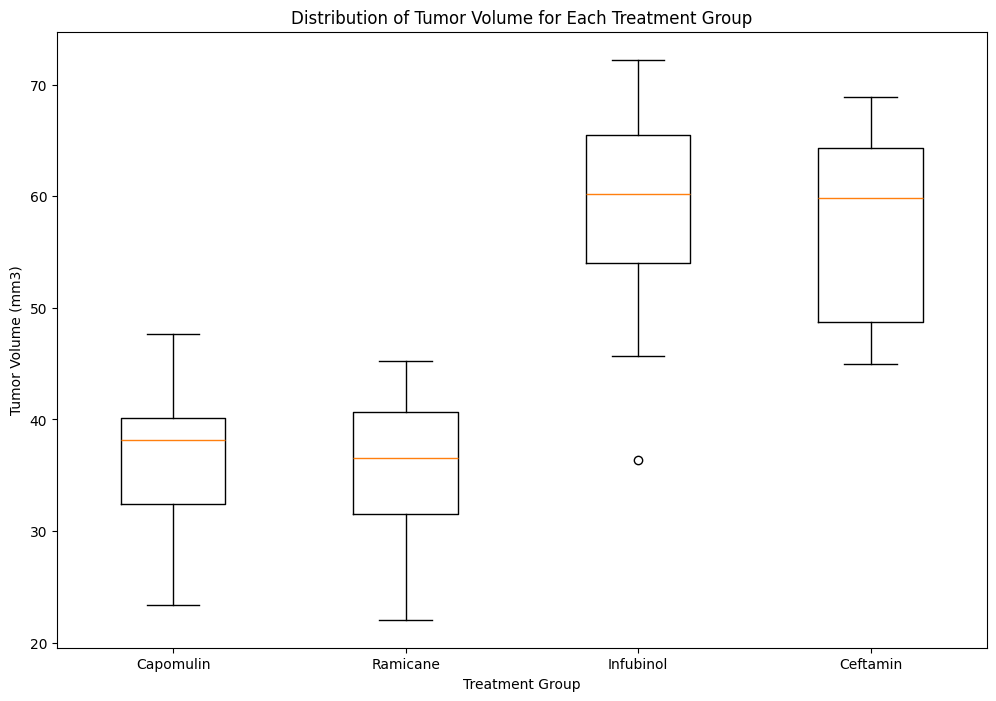

In [34]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = [subset['Tumor Volume (mm3)'].values for subset in drug_subset.values()]

# Create a box plot to show the distribution of tumor volume for each treatment group
plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=treatments_list)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

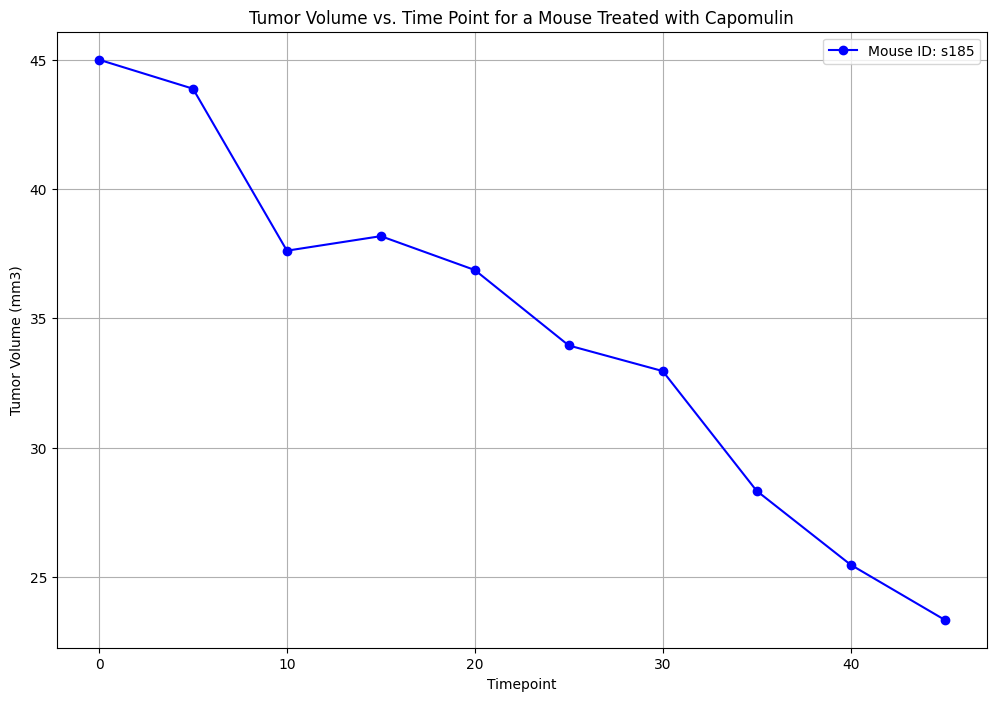

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
capomulin_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(12, 8))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouse_id}')
plt.title('Tumor Volume vs. Time Point for a Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

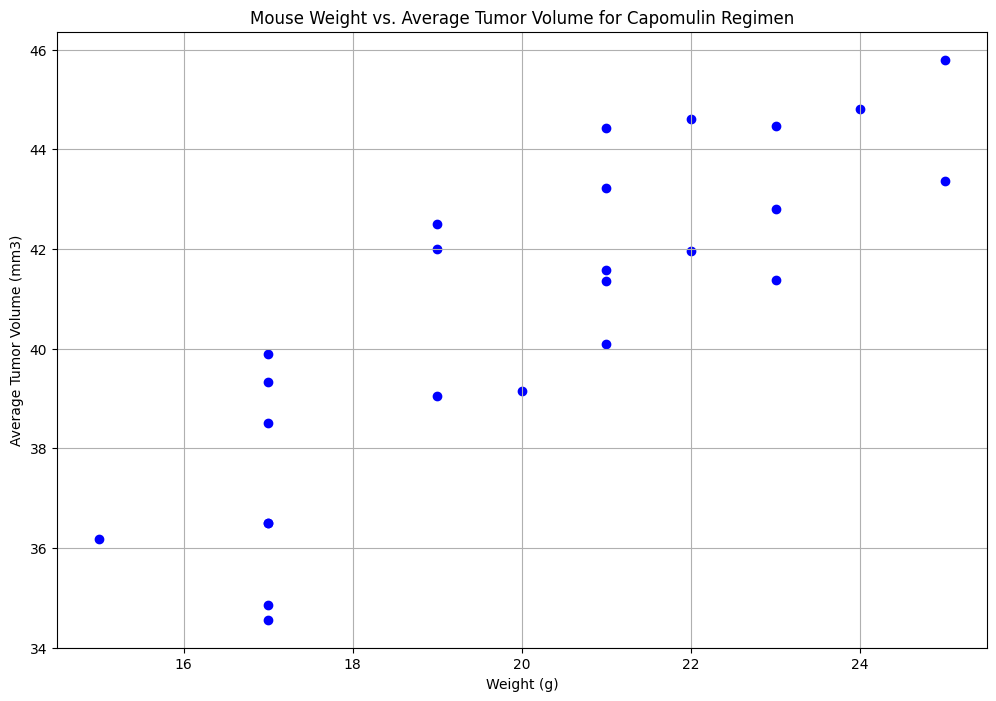

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weight
capomulin_avg_tumor_volume = capomulin_avg_tumor_volume.reset_index()
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Create a scatter plot of mouse weight vs. average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(12, 8))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_avg_tumor_volume['Weight (g)'].corr(capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Calculate the regression values
regress_values = slope * capomulin_avg_tumor_volume['Weight (g)'] + intercept

# Create the linear regression equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

# Display the correlation coefficient and linear regression model
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation}")
print(f"The linear regression model is: {line_eq}")

The correlation coefficient between mouse weight and average tumor volume is: 0.8419363424694722
The linear regression model is: y = 0.95x + 21.55
